In [21]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.2


In [2]:
#Loading dataset
my_dataset = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = my_dataset.load_data()

In [3]:
#Adding label names to a list
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#Checking the datatypes and training data
print(type(my_dataset))
print(type(train_images))
print(type(train_labels))
print(type(test_images))
print(type(test_labels))

<class 'module'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# Checking the size and dimension of the ndarrays
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
# Each array has a size of 28*28. Train section has 60000 arrays and test section has 10000 arrays  

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


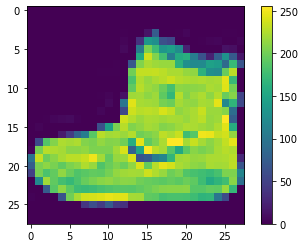

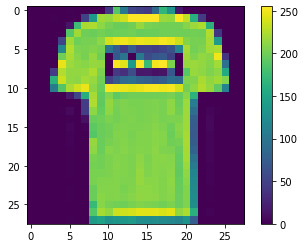

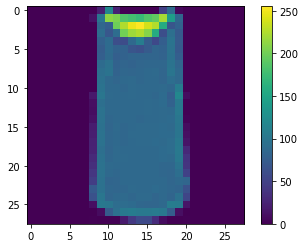

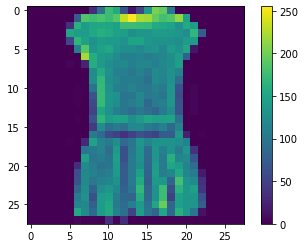

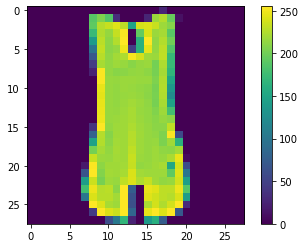

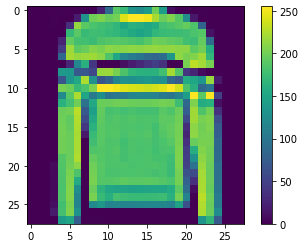

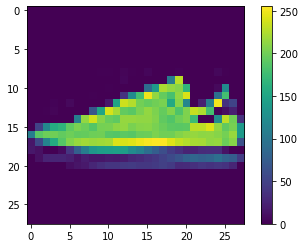

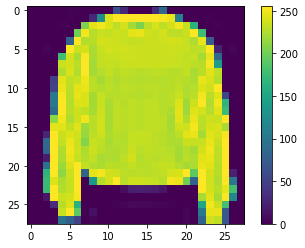

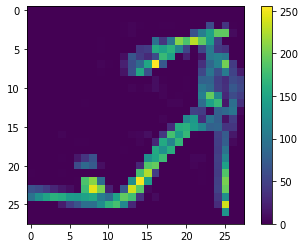

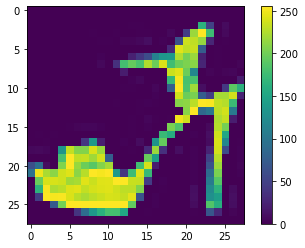

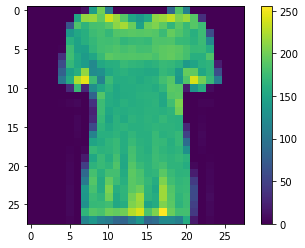

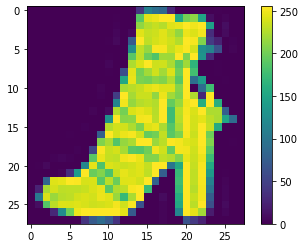

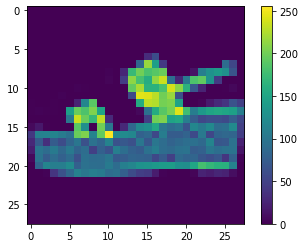

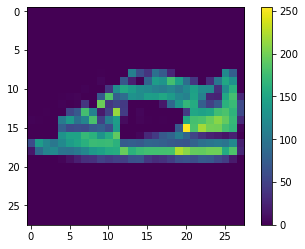

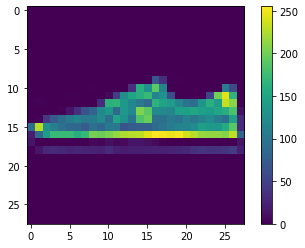

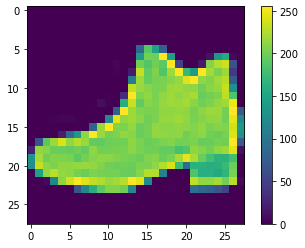

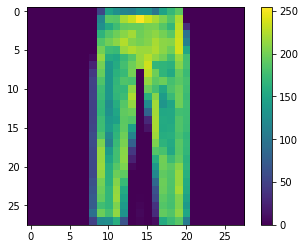

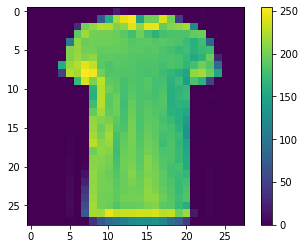

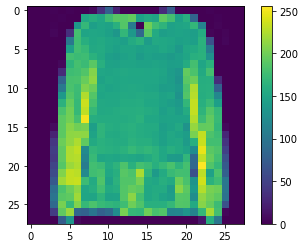

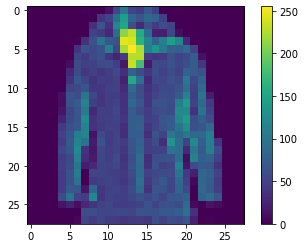

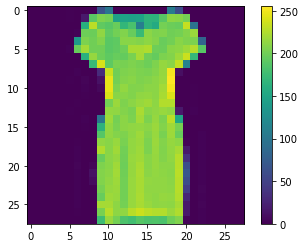

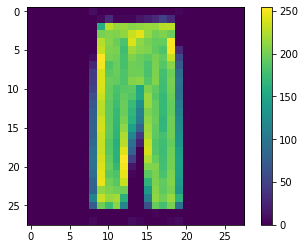

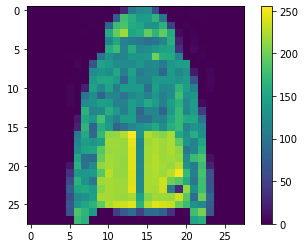

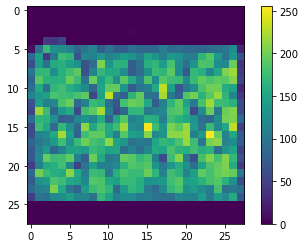

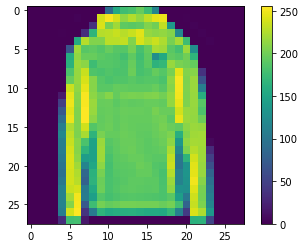

In [6]:
#Checking sample training data
for i in range(25) :
    plt.figure()
    plt.imshow(train_images[i])
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [7]:
# Normalizing the data for better accuracy
train_images = train_images / 255.0
test_images = test_images / 255.0

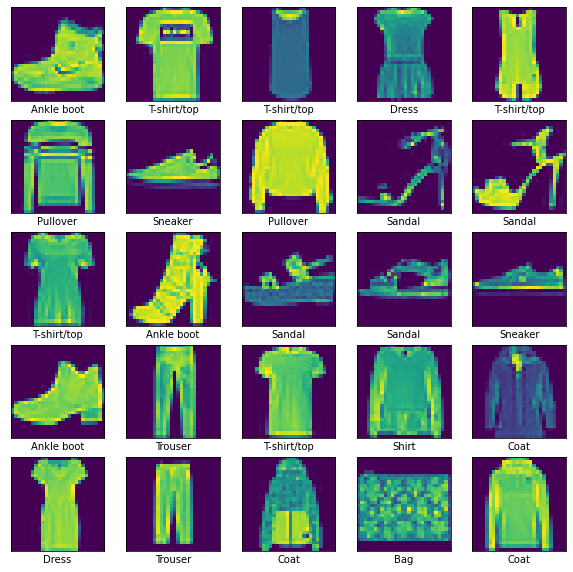

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
# Designing the mlp
mlp = models.Sequential()
mlp.add(layers.Flatten())
mlp.add(layers.Dense(128, activation='swish', kernel_initializer='he_uniform'))
mlp.add(layers.Dense(128, activation='swish', kernel_initializer='he_uniform'))
mlp.add(layers.Dense(10))

In [10]:
#Compiling the mlp
mlp.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
#Training the mlp
mlp.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 922us/step - loss: 0.4698 - accuracy: 0.8314
Epoch 2/10
1875/1875 [==============================] - 2s 994us/step - loss: 0.3474 - accuracy: 0.8704
Epoch 3/10
1875/1875 [==============================] - 2s 911us/step - loss: 0.3107 - accuracy: 0.8841
Epoch 4/10
1875/1875 [==============================] - 2s 909us/step - loss: 0.2833 - accuracy: 0.8926
Epoch 5/10
1875/1875 [==============================] - 2s 912us/step - loss: 0.2659 - accuracy: 0.9001
Epoch 6/10
1875/1875 [==============================] - 2s 916us/step - loss: 0.2503 - accuracy: 0.9051
Epoch 7/10
1875/1875 [==============================] - 2s 914us/step - loss: 0.2366 - accuracy: 0.9100
Epoch 8/10
1875/1875 [==============================] - 2s 914us/step - loss: 0.2233 - accuracy: 0.9154
Epoch 9/10
1875/1875 [==============================] - 2s 911us/step - loss: 0.2136 - accuracy: 0.9188
Epoch 10/10
1875/1875 [==============================] - 2s 912u

In [12]:
#Testing the mlp
test_loss, test_acc = mlp.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3483 - accuracy: 0.8805 - 315ms/epoch - 1ms/step

Test accuracy: 0.8805000185966492


In [13]:
#Creating a mlp to calculate probability
probability_mlp = tf.keras.Sequential([mlp, 
                                         layers.Softmax()])
predictions_mlp = probability_mlp.predict(test_images)

In [14]:
#Predicting a single image using the probability mlp
predictions_mlp[0]

array([5.5130791e-08, 7.1255201e-08, 2.5201558e-08, 1.2770390e-07,
       1.9887509e-07, 8.3049399e-06, 7.5261497e-08, 2.5743456e-04,
       1.9080721e-09, 9.9973375e-01], dtype=float32)

In [15]:
#Getting the index of highest probability
np.argmax(predictions_mlp[0])

9

In [16]:
test_labels[0]

9

In [17]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

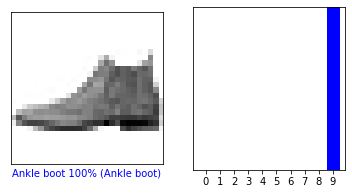

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_mlp[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_mlp[i],  test_labels)
plt.show()

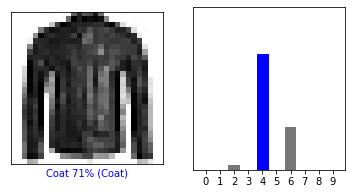

In [19]:
i = 50
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_mlp[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_mlp[i],  test_labels)
plt.show()


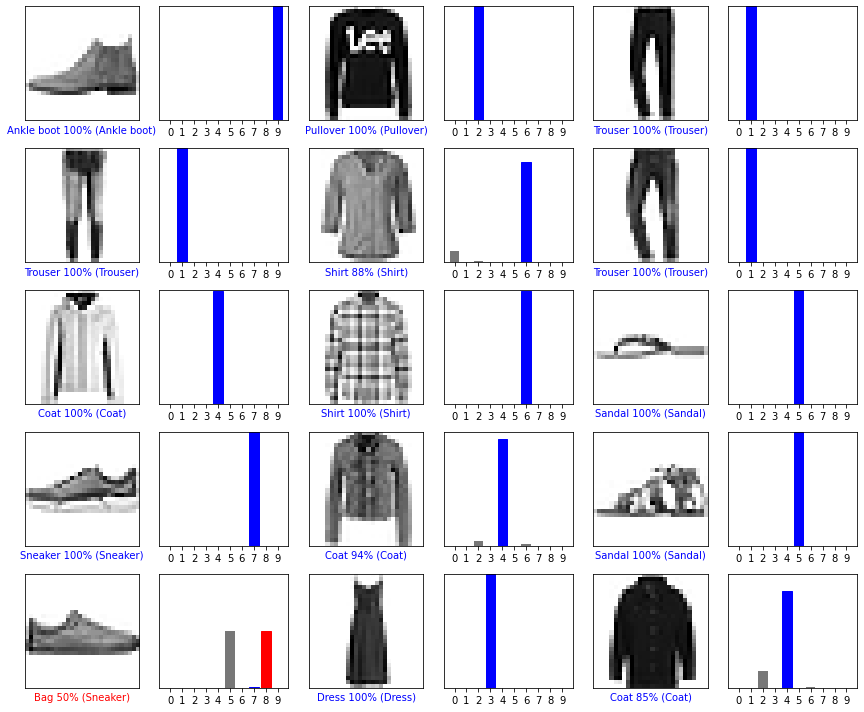

In [20]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_mlp[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_mlp[i], test_labels)
plt.tight_layout()
plt.show()